In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.metrics import classification_report

%matplotlib inline

In [60]:
df = pd.read_csv("predictions_25_epochs.csv")

In [61]:
df = df.rename(columns={'0': 'filename', '1': 'conflict'})

In [62]:
df.head()

,filename,conflict,class,prediction,avg,stdv,positive,negative,majority
0,06-05-10_2250_2280,7.9,1,"[0.99421763, 0.9979219, 0.99968576, 0.9975103,...",0.998532,0.001665,19,0,1
1,06-09-13_2310_2340,8.5,1,"[0.94004524, 0.7154069, 0.98633236, 0.99207413...",0.605716,0.372241,11,8,1
2,07-05-16_1440_1470,-5.9,0,"[0.009947419, 1.5199184e-06, 0.20875564, 0.000...",0.168271,0.319009,3,16,0
3,07-09-17_720_750,1.1,1,"[0.97027767, 0.48355103, 0.00017952919, 0.0045...",0.465564,0.401484,7,12,0
4,06-11-08_1410_1440,7.4,1,"[0.027306736, 0.31755626, 0.8729861, 0.9844569...",0.793733,0.325576,15,4,1


### Performance of the model selecting the majority class for each audio file

In [5]:
metrics = classification_report(df["class"].values,df["majority"].values)
print(metrics)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       167
           1       0.78      0.65      0.71       119

    accuracy                           0.78       286
   macro avg       0.78      0.76      0.76       286
weighted avg       0.78      0.78      0.77       286



### In the paper they did an average of the results of each chunk and selected the class based on that value, lets see how it performs with that method

In [6]:
df["avg_classification"] = df["avg"].apply(lambda x: 1 if x >= 0.5 else 0)

In [7]:
metrics = classification_report(df["class"].values,df["avg_classification"].values)
print(metrics)

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       167
           1       0.80      0.68      0.74       119

    accuracy                           0.80       286
   macro avg       0.80      0.78      0.79       286
weighted avg       0.80      0.80      0.79       286



### We can see that the performance of the model is better using this method, probably thats the reason this was the method reported.   
### Our model also gets identical results of the ones reported in the paper, looks like we managed to replicate it accurately

## When the predictions fail

In [8]:
df["right_prediction"] = np.where(df["class"] != df["avg_classification"], "no", "yes")

In [9]:
# df[df["right_prediction"] == "no"]["conflict"].hist()

/home/alberto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


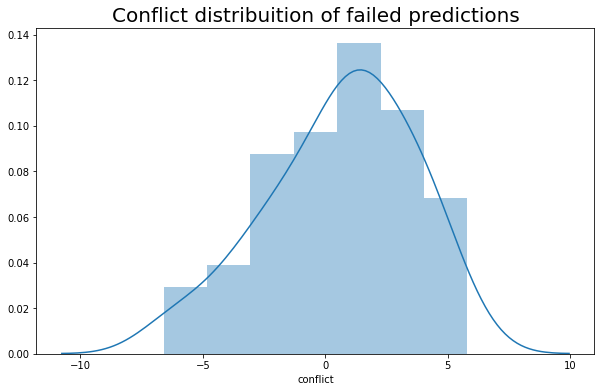

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df[df["right_prediction"] == "no"]["conflict"])
plt.title('Conflict distribuition of failed predictions', fontsize=20);

**most of the failures are with conflict levels close to zero, thats not surprising, those are harder to predict, its the expected behaviour**

In [11]:
# df["conflict"].hist()

In [12]:
df[df["right_prediction"] == "no"]["stdv"].mean()

0.36629945778384293

In [13]:
df[df["right_prediction"] == "yes"]["stdv"].mean()

0.30868837664826987

/home/alberto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


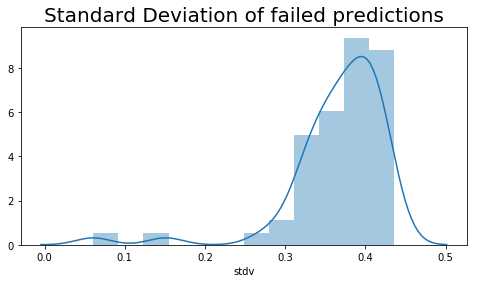

In [14]:
plt.figure(figsize=(8,4))
sns.distplot(df[df["right_prediction"] == "no"]["stdv"])
plt.title('Standard Deviation of failed predictions', fontsize=20);

/home/alberto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


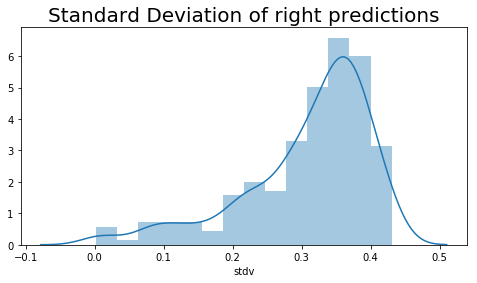

In [15]:
plt.figure(figsize=(8,4))
sns.distplot(df[df["right_prediction"] == "yes"]["stdv"])
plt.title('Standard Deviation of right predictions', fontsize=20);

### Failed file example

In [44]:
pred = ast.literal_eval(df.iloc[[3]]["prediction"].values[0])
time_line = [i*1.5 for i in range(1, len(pred)+1)]

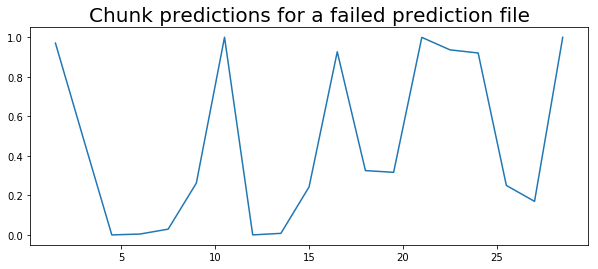

In [47]:
plt.figure(figsize=(10,4))
sns.lineplot(x=time_line, y=pred)
plt.title('Chunk predictions for a failed prediction file', fontsize=20);

### Success file example

In [50]:
pred = ast.literal_eval(df.iloc[[5]]["prediction"].values[0])
time_line = [i*1.5 for i in range(1, len(pred)+1)]

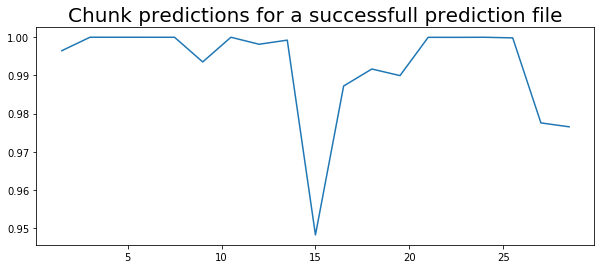

In [52]:
plt.figure(figsize=(10,4))
sns.lineplot(x=time_line, y=pred)
plt.title('Chunk predictions for a successfull prediction file', fontsize=20);

/home/alberto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


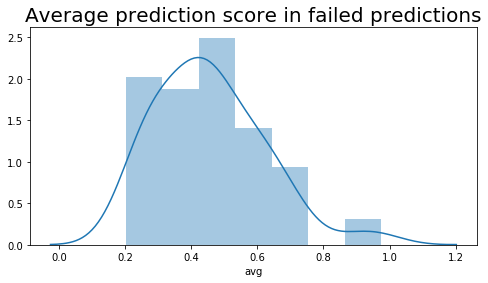

In [55]:
plt.figure(figsize=(8,4))
sns.distplot(df[df["right_prediction"] == "no"]["avg"])
plt.title('Average prediction score in failed predictions', fontsize=20);

/home/alberto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


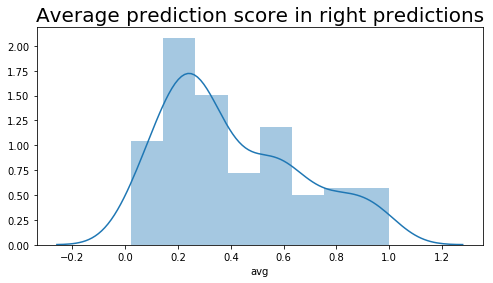

In [57]:
plt.figure(figsize=(8,4))
sns.distplot(df[df["right_prediction"] == "yes"]["avg"])
plt.title('Average prediction score in right predictions', fontsize=20);

In [29]:
df[df["right_prediction"] == 0].sort_values(by="1")

,0,1,class,prediction,avg,stdv,positive,negative,majority,avg_classification,right_prediction
32,06-05-03_1140_1170,-6.6,0,"[0.96891487, 0.6520569, 0.7387439, 0.9138652, ...",0.646604,0.334891,13,6,1,1,0
110,06-12-13_2250_2280,-6.3,0,"[0.009058088, 0.5060062, 0.9725094, 0.8793752,...",0.592726,0.407108,12,7,1,1,0
261,07-11-28_2220_2250,-5.6,0,"[0.006966114, 0.017238438, 0.005277306, 0.8975...",0.638711,0.416866,13,6,1,1,0
258,06-06-07_330_360,-4.5,0,"[0.7414963, 0.89411926, 0.33679754, 0.19425559...",0.563944,0.377835,11,8,1,1,0
167,06-04-05_1320_1350,-4.2,0,"[0.58399355, 0.78701276, 0.7627643, 0.98323715...",0.502635,0.408130,11,8,1,1,0
60,06-06-07_2700_2730,-3.9,0,"[0.9764702, 0.9424407, 0.14459813, 0.050945133...",0.649635,0.403390,12,7,1,1,0
83,07-12-19_840_870,-3.2,0,"[0.6424084, 0.022244483, 0.9997746, 0.7708168,...",0.503087,0.408432,10,9,1,1,0
124,07-02-21_180_210,-3.0,0,"[0.9984933, 0.99994624, 0.7244279, 0.99759823,...",0.975029,0.060726,19,0,1,1,0
235,07-02-28_2070_2100,-2.9,0,"[0.0739207, 0.9886483, 0.056712568, 0.8014709,...",0.573353,0.378697,11,8,1,1,0
6,06-12-13_1680_1710,-2.5,0,"[0.32385913, 0.29536706, 0.1375246, 0.5363851,...",0.555444,0.347195,9,10,0,1,0


### Results for predictions with a time step of only 0.5 seconds:

In [2]:
df = pd.read_csv("predictions_25ep_05seconds.csv")

In [3]:
df = df.rename(columns={'0': 'filename', '1': 'conflict'})

In [4]:
metrics = classification_report(df["class"].values,df["majority"].values)
print(metrics)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       167
           1       0.80      0.61      0.70       119

    accuracy                           0.78       286
   macro avg       0.78      0.75      0.76       286
weighted avg       0.78      0.78      0.77       286



In [5]:
df["avg_classification"] = df["avg"].apply(lambda x: 1 if x >= 0.5 else 0)

In [6]:
metrics = classification_report(df["class"].values,df["avg_classification"].values)
print(metrics)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       167
           1       0.81      0.63      0.71       119

    accuracy                           0.78       286
   macro avg       0.79      0.76      0.77       286
weighted avg       0.79      0.78      0.78       286



**the results are worse using chunks of 3 seconds and a time step of only 0.5 seconds**